In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#LA Water Supply in Acre Feet by Year per LA Department of Water and Power
#1970-2017
#Source of data: https://www.kaggle.com/cityofLA/ladwp-water-supply-in-acre-feet
#Date Value truncated to show year only (1970-06-30T00:00:00 coverted to 1970)

In [21]:
#Find out where to place my csv file
import os
print(os.getcwd())

C:\Users\Harrry


In [28]:
#Check to see if the csv file is read properly
df = pd.read_csv('ladwp-water-supply-in-acre-feet-2.csv', index_col=0)
print(df)

           Fiscal Year     MWD  LA Aqueduct  Local Groundwater  \
Date Value                                                       
1970           1969-70  146981       355422              83627   
1971           1970-71   52194       454160              73847   
1972           1971-72   59852       469185              75033   
1973           1972-73   32766       458726              79726   
1974           1973-74   25525       460942              76517   
1975           1974-75   32611       459655              76253   
1976           1975-76   25197       475577             118203   
1977           1976-77  108689       333376             132280   
1978           1977-78   45899       361356              92738   
1979           1978-79   18661       504325              68574   
1980           1979-80   21109       495267              75743   
1981           1980-81   45709       488333              95252   
1982           1981-82   34556       466293             112266   
1983      

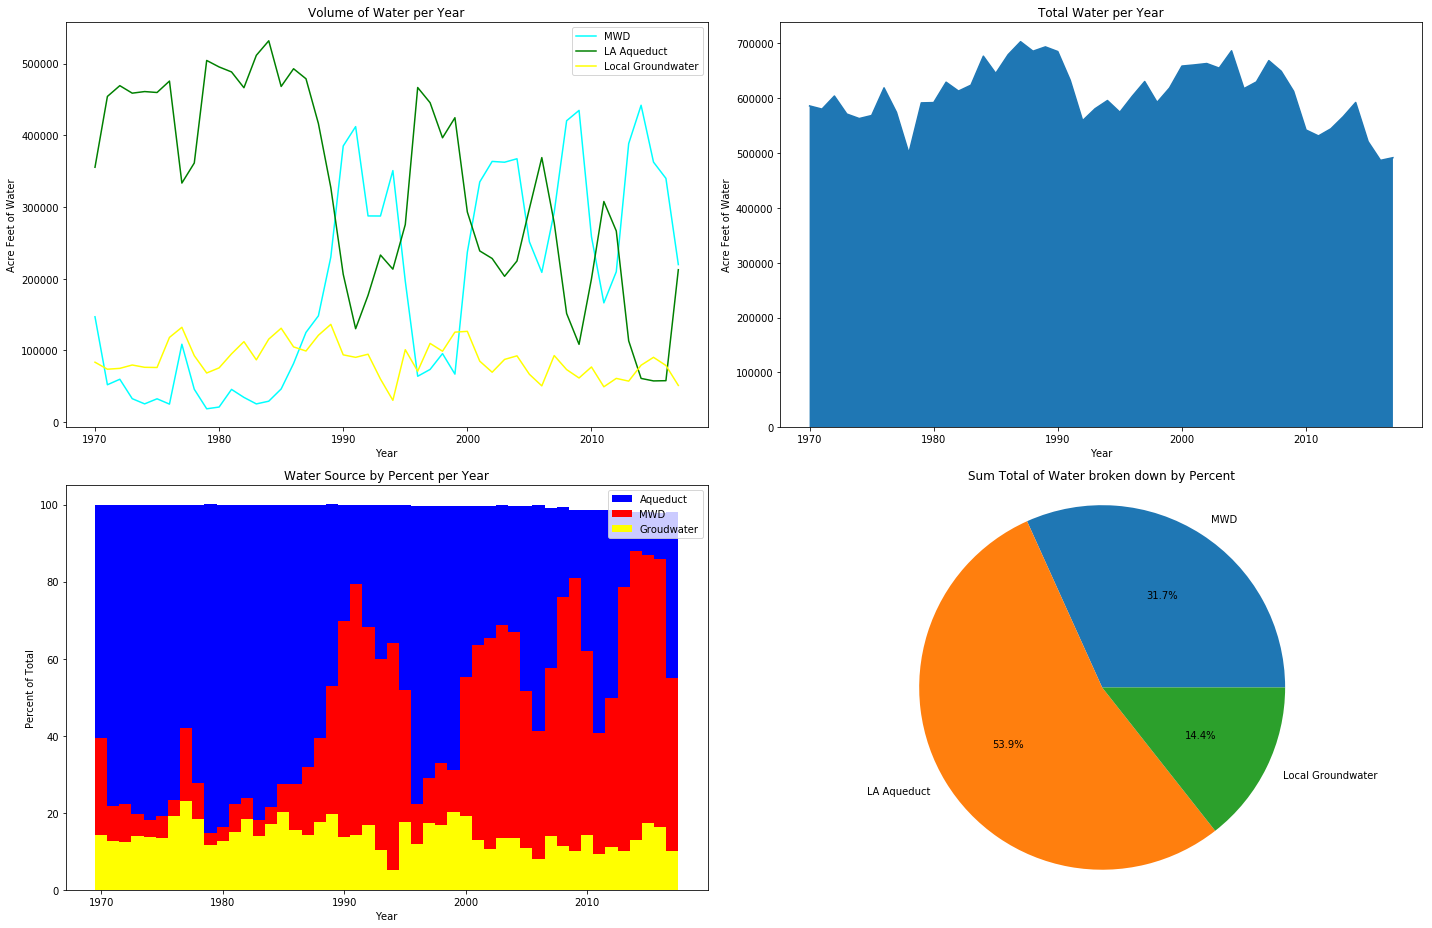

In [107]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
mwd, = plt.plot(df['MWD'], label='MWD', color='cyan')
la_aqueduct, = plt.plot(df['LA Aqueduct'], label='LA Aqueduct', color='green')
local_groundwater, = plt.plot(df['Local Groundwater'], label='Local Groundwater', color='yellow')
plt.legend(handles=[mwd, la_aqueduct, local_groundwater])
plt.ylabel('Acre Feet of Water')
plt.xlabel('Year')
plt.title('Volume of Water per Year')

#This plot reveals the volume of water from different sources
#From here, you can see an inverse relationship between MWD and LA Aqueduct
#Per: https://data.lacity.org/A-Livable-and-Sustainable-City/LADWP-Water-Supply-in-Acre-Feet/qyvz-diiw
#The Metropolitan Water District of Southern California provides a supplemental supply of water to its member agencies.
#MWD serves its member agencies as a water wholesaler and has no retail customers.
#LADWP is a member agency and relies on imported water purchased from MWD to meet its current water supply requirements
#not otherwise met from its other resources.

plt.subplot(2,2,2)
plt.plot(df['Total Acre Feet'])
plt.fill_between(df.index,df['Total Acre Feet'],0)
plt.ylabel('Acre Feet of Water')
plt.xlabel('Year')
plt.ylim(ymin=0)
#Minimum still set to zero because using a minimum of 500000 would make the differences from year-to-year look too drastic
plt.title('Total Water per Year')
bar_mwd = df['MWD % of Total']
bar_la_aqueduct = df['LA Aqueduct % of Total']
bar_local_ground = df['Local Groundwater % of Total']

#This chart shows the total amount of water for LADWP
#It would be nice to have this chart sit side-by-side with population growth
#You would assume increase in total water for LADWP, however this chart shows a decline back to 1970 volumes

plt.subplot(2,2,3)
b_mwd = df['MWD % of Total']
b_la_aqueduct = df['LA Aqueduct % of Total']
b_local_ground = df['Local Groundwater % of Total']

plt.bar(df.index, b_local_ground+b_mwd+b_la_aqueduct, width=1, color='blue', label='Aqueduct')
plt.bar(df.index, b_local_ground+b_mwd, width=1, color='red', label='MWD')
plt.bar(df.index, b_local_ground, width=1, color='yellow', label='Groudwater')
plt.title('Water Source by Percent per Year')
plt.ylabel('Percent of Total')
plt.xlabel('Year')
plt.legend(loc="upper right")

#This bar chart shows percentage of water per source
#Bars are stacked to total approximately 100%
#As with comments above, Aqueduct water is inversely related to MWD

plt.subplot(2,2,4)
sum_mwd = np.sum(df['MWD'])
sum_la_aqueduct = np.sum(df['LA Aqueduct'])
sum_local_groundwater = np.sum(df['Local Groundwater'])

sum_total = sum_mwd + sum_la_aqueduct + sum_local_groundwater

labels = 'MWD', 'LA Aqueduct', 'Local Groundwater'
sizes = [sum_mwd/sum_total, sum_la_aqueduct/sum_total, sum_local_groundwater/sum_total]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sum Total of Water broken down by Percent')

#I needed a fourth chart, so I decided to sum the sources of water, to see what source provides the most water to LADWP
#I also decided to use a different type of chart: Pie

plt.tight_layout()
plt.show()
